In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

In [57]:
from f2_spade import *

In [58]:
def k_select(positive_seqs,negative_seqs,k,P,N,total):
    wracc_left=(P/total)*(N/total)
    Positive_seq_Discoverd=set(positive_seqs.keys())
    Negative_seq_Discoverd=set(negative_seqs.keys())
    To_discovere=Positive_seq_Discoverd.union(Negative_seq_Discoverd)
    sequences={}
    # the following wracc_x is added to compute weighted relative accuracy (Wracc)
    for sequence in To_discovere:
        wracc_x=wracc_left*((positive_seqs.get(sequence,0)/P)-(negative_seqs.get(sequence,0)/N))
        #sequences[sequence]=[positive_seqs.get(sequence,0),negative_seqs.get(sequence,0),np.round(wracc_x,5)]
        sequences[sequence]=[positive_seqs.get(sequence,0),negative_seqs.get(sequence,0),np.round(wracc_x,5)]

    sequences=sorted(sequences.items(), key=lambda item: item[1][2],reverse=True)
    i=1
    j=0
    prev=sequences[0][1][2]
    top_k_seq=[]
    for sequence in sequences:
        if sequence[1][2]!=prev:
            i+=1
            prev=sequence[1][2]
        if i<=k:
            #out='['+', '.join(list(sequence[0]))+']'
            top_k_seq.append(sequence[0])
            #print(out,sequence[1][0],sequence[1][1],sequence[1][2])
            j+=1
        else:
            break
    return top_k_seq

# Example of running the algorithm to check if everything in f2_spade works

In [59]:
# TODO: read the dataset files and call your miner to print the top k itemsets
ds_positive=Dataset_Sequence('p-positive.txt')
P=ds_positive.trans_num() #  The number of transactions in positive class
ds_negative=Dataset_Sequence('p-negative.txt')
N=ds_negative.trans_num() #  The number of transactions in negative class
total=P+N
#print('P=',P,"N=",N,'Total=',total)
#print(ds_positive.transactions)
positive_seqs=f2_spade(ds_positive, 0.2,printing=False)
negative_seqs=f2_spade(ds_negative, 0.05,printing=False)
top_k_seq=k_select(positive_seqs,negative_seqs,3,P,N,total)

In [60]:
top_k_seq=k_select(positive_seqs,negative_seqs,10,P,N,total)

In [61]:
top_k_seq

[('Y',),
 ('E', 'Y'),
 ('Y', 'G'),
 ('P', 'Y'),
 ('D', 'Y'),
 ('Y', 'V'),
 ('Y', 'D'),
 ('Y', 'Y'),
 ('Y', 'P'),
 ('Y', 'A')]

# Machine Learning Performance Comparision

## 1- function for creating Pandas data frame

In [62]:
def check_subsequence(a,b):
    # This function check if b is a subsequence of a
    # a is the possible supersequence
    # b is the possible subsequence
    try:
        if len(b)<len(a):
            start=a.index(b[0])
            count=0
            for idx in range(len(a)-start):
                if count<len(b) and a[start+idx]==b[count]:
                    count+=1
            if count==len(b):
                return True
        return False
    except:
        return False

In [63]:
def Create_df(seqList,positiveTrans,negativeTrans):
    '''
    seqList=[]
    for i in selected:
        seqs=list(selected[i])
        for seq in seqs:
            seqList.append(seq)
    '''
    frame = pd.DataFrame(columns = seqList+['label'])
    counter=0
    # Adding Positive Class
    for transaction in positiveTrans:
        seqObserved=[]
        for seq in seqList:
            seqObserved.append(int(check_subsequence(transaction,seq)))
        seqObserved.append(True)
        frame.loc[counter]=seqObserved
        counter+=1
    # Adding Negative Class
    for transaction in negativeTrans:
        seqObserved=[]
        for seq in seqList:
            seqObserved.append(int(check_subsequence(transaction,seq)))
        seqObserved.append(False)
        frame.loc[counter]=seqObserved
        counter+=1
    frame = frame.sample(frac=1).reset_index(drop=True)
    return frame

In [64]:
# TODO: read the dataset files and call your miner to print the top k itemsets
ds_positive=Dataset_Sequence('positive.txt')
P=ds_positive.trans_num() #  The number of transactions in positive class
ds_negative=Dataset_Sequence('negative.txt')
N=ds_negative.trans_num() #  The number of transactions in negative class
total=P+N
#print('P=',P,"N=",N,'Total=',total)
#print(ds_positive.transactions)
positive_seqs=f2_spade(ds_positive, 0.2,printing=False)
negative_seqs=f2_spade(ds_negative, 0.05,printing=False)
top_k_seq=k_select(positive_seqs,negative_seqs,3,P,N,total)

In [65]:
frame=Create_df(top_k_seq,ds_positive.transactions,ds_negative.transactions)

In [66]:
frame.sample(5)

,"(A, A, C)","(A, A, A)","(A, A, C, A)","(A, C)","(A, C, A)","(A, C, C, A)","(A, C, C)","(A, B, A)",label
5,1,1,1,1,1,1,1,0,True
0,0,0,0,0,0,0,0,0,False
1,0,0,0,1,1,1,1,1,False
6,0,0,0,1,1,1,1,1,True
4,1,1,1,1,1,1,1,1,True


### 1-1 Running Experiment on Machine Learning (Example) (Logistic Regression and Decision Tree)

#### 1-1-1 Protein Dataset with k=10

In [85]:
# TODO: read the dataset files and call your miner to print the top k itemsets
ds_positive=Dataset_Sequence('p-positive.txt')
P=ds_positive.trans_num() #  The number of transactions in positive class
ds_negative=Dataset_Sequence('p-negative.txt')
N=ds_negative.trans_num() #  The number of transactions in negative class
total=P+N
#print('P=',P,"N=",N,'Total=',total)
#print(ds_positive.transactions)
positive_seqs=f2_spade(ds_positive, 0.2,printing=False)
negative_seqs=f2_spade(ds_negative, 0.05,printing=False)
top_k_seq=k_select(positive_seqs,negative_seqs,10,P,N,total)
frame=Create_df(top_k_seq,ds_positive.transactions,ds_negative.transactions)

In [86]:
frame.sample(5)

,"(Y,)","(E, Y)","(Y, G)","(P, Y)","(D, Y)","(Y, V)","(Y, D)","(Y, Y)","(Y, P)","(Y, A)",label
639,0,0,0,0,0,0,0,0,0,0,False
682,1,0,1,1,1,1,1,1,0,0,True
395,1,0,1,1,1,1,0,0,0,1,True
375,1,1,0,0,0,0,0,0,0,0,False
144,1,0,1,0,1,1,1,1,1,0,True


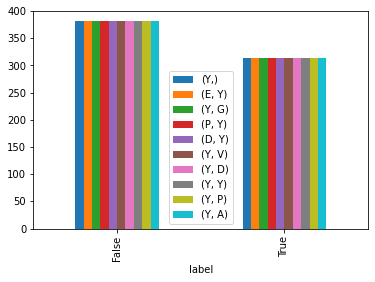

In [87]:
frame.groupby(by='label').count().plot(kind='bar')

In [88]:
 X_train, X_test, y_train, y_test = train_test_split(frame.iloc[:,:-1], frame.iloc[:,-1], test_size=0.3, random_state=42)

##### Logistic Regression

In [89]:
lr = LogisticRegression(random_state=0).fit(X_train, y_train.astype(int))
print('Logistic Regression:')
print('\tTraining Accuracy:',lr.score(X_train, y_train.astype(int)))
print('\tTest Accuracy:',lr.score(X_test, y_test.astype(int)))

Logistic Regression:
	Training Accuracy: 0.9156378600823045
	Test Accuracy: 0.8899521531100478


#### Decision Tree

In [90]:
dt = DecisionTreeClassifier(random_state=0).fit(X_train, y_train.astype(int))
print('Decision Tree:')
print('\tTraining Accuracy:',dt.score(X_train, y_train.astype(int)))
print('\tTest Accuracy:',dt.score(X_test, y_test.astype(int)))

Decision Tree:
	Training Accuracy: 0.977366255144033
	Test Accuracy: 0.9138755980861244


#### 1-1-2 Reuters Dataset with k=10

In [98]:
# TODO: read the dataset files and call your miner to print the top k itemsets
ds_positive=Dataset_Sequence('r-positive.txt')
P=ds_positive.trans_num() #  The number of transactions in positive class
ds_negative=Dataset_Sequence('r-negative.txt')
N=ds_negative.trans_num() #  The number of transactions in negative class
total=P+N
#print('P=',P,"N=",N,'Total=',total)
#print(ds_positive.transactions)
positive_seqs=f2_spade(ds_positive, 0.2,printing=False)
negative_seqs=f2_spade(ds_negative, 0.05,printing=False)
top_k_seq=k_select(positive_seqs,negative_seqs,10,P,N,total)
frame=Create_df(top_k_seq,ds_positive.transactions,ds_negative.transactions)

In [99]:
frame.sample(5)

,"(ct,)","(ct, reuter)","(ct, ct)","(net,)","(ct, ct, reuter)","(net, reuter)","(shr,)","(shr, reuter)","(shr, net)","(net, net, reuter)",label
3750,1,1,1,0,1,0,0,0,0,0,True
2319,0,0,0,0,0,0,0,0,0,0,False
1066,1,1,1,1,1,1,1,1,1,1,True
3210,1,1,1,0,1,0,0,0,0,0,True
3537,1,1,1,1,1,1,1,1,1,1,True


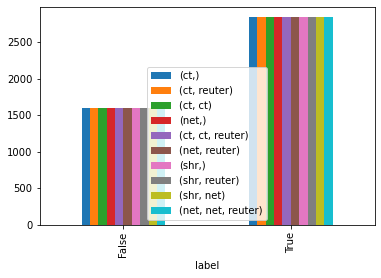

In [100]:
frame.groupby(by='label').count().plot(kind='bar')

In [101]:
 X_train, X_test, y_train, y_test = train_test_split(frame.iloc[:,:-1], frame.iloc[:,-1], test_size=0.3, random_state=42)

##### Logistic Regression

In [102]:
lr = LogisticRegression(random_state=0).fit(X_train, y_train.astype(int))
print('Logistic Regression:')
print('\tTraining Accuracy:',lr.score(X_train, y_train.astype(int)))
print('\tTest Accuracy:',lr.score(X_test, y_test.astype(int)))

Logistic Regression:
	Training Accuracy: 0.8907156673114119
	Test Accuracy: 0.8894736842105263


#### Decision Tree

In [103]:
dt = DecisionTreeClassifier(random_state=0).fit(X_train, y_train.astype(int))
print('Decision Tree:')
print('\tTraining Accuracy:',dt.score(X_train, y_train.astype(int)))
print('\tTest Accuracy:',dt.score(X_test, y_test.astype(int)))

Decision Tree:
	Training Accuracy: 0.8907156673114119
	Test Accuracy: 0.8894736842105263


## 1-2 Comparing the performance of the algorithm (wracc) with different k

### Protein Dataset

In [106]:
lr_train_acc=[]
lr_test_acc=[]
dt_train_acc=[]
dt_test_acc=[]

# Finding all candidate sequence
ds_positive=Dataset_Sequence('p-positive.txt')
P=ds_positive.trans_num() #  The number of transactions in positive class
ds_negative=Dataset_Sequence('p-negative.txt')
N=ds_negative.trans_num() #  The number of transactions in negative class
total=P+N
#print('P=',P,"N=",N,'Total=',total)
#print(ds_positive.transactions)
positive_seqs=f2_spade(ds_positive, 0.2,printing=False)
negative_seqs=f2_spade(ds_negative, 0.05,printing=False)

In [107]:

KS=[5,10,20,30,40,50,60,70,80,90,100]
for k in KS:
    print('Current k: ',k)
    top_k_seq=k_select(positive_seqs,negative_seqs,k,P,N,total)# finding top-k
    frame=Create_df(top_k_seq,ds_positive.transactions,ds_negative.transactions)# creating the dataframe
    X_train, X_test, y_train, y_test = train_test_split(frame.iloc[:,:-1], frame.iloc[:,-1], test_size=0.3, random_state=42)
    """
    Logistic Regression
    """
    lr = LogisticRegression(random_state=0).fit(X_train, y_train.astype(int))
    lr_train_acc.append(lr.score(X_train, y_train.astype(int)))
    lr_test_acc.append(lr.score(X_test, y_test.astype(int)))
        
    """
    Decision Tree
    """
    dt = DecisionTreeClassifier(random_state=0).fit(X_train, y_train.astype(int))
    dt_train_acc.append(dt.score(X_train, y_train.astype(int)))
    dt_test_acc.append(dt.score(X_test, y_test.astype(int)))

Current k:  5
Current k:  10
Current k:  20
Current k:  30
Current k:  40
Current k:  50
Current k:  60
Current k:  70
Current k:  80
Current k:  90
Current k:  100


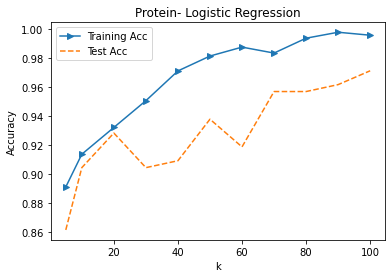

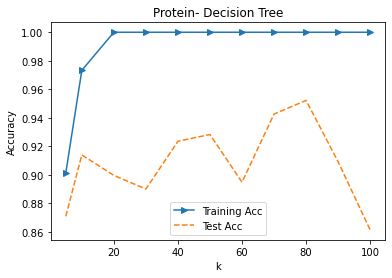

### Reuters Dataset

In [109]:
lr_train_acc=[]
lr_test_acc=[]
dt_train_acc=[]
dt_test_acc=[]

# Finding all candidate sequence
ds_positive=Dataset_Sequence('r-positive.txt')
P=ds_positive.trans_num() #  The number of transactions in positive class
ds_negative=Dataset_Sequence('r-negative.txt')
N=ds_negative.trans_num() #  The number of transactions in negative class
total=P+N
#print('P=',P,"N=",N,'Total=',total)
#print(ds_positive.transactions)
positive_seqs=f2_spade(ds_positive, 0.2,printing=False)
negative_seqs=f2_spade(ds_negative, 0.05,printing=False)


In [110]:

KS=[5,10,20,30,40,50,60,70,80,90,100]
for k in KS:
    print('Current k: ',k)
    top_k_seq=k_select(positive_seqs,negative_seqs,k,P,N,total)# finding top-k
    frame=Create_df(top_k_seq,ds_positive.transactions,ds_negative.transactions)# creating the dataframe
    X_train, X_test, y_train, y_test = train_test_split(frame.iloc[:,:-1], frame.iloc[:,-1], test_size=0.3, random_state=42)
    """
    Logistic Regression
    """
    lr = LogisticRegression(random_state=0).fit(X_train, y_train.astype(int))
    lr_train_acc.append(lr.score(X_train, y_train.astype(int)))
    lr_test_acc.append(lr.score(X_test, y_test.astype(int)))
        
    """
    Decision Tree
    """
    dt = DecisionTreeClassifier(random_state=0).fit(X_train, y_train.astype(int))
    dt_train_acc.append(dt.score(X_train, y_train.astype(int)))
    dt_test_acc.append(dt.score(X_test, y_test.astype(int)))

Current k:  5
Current k:  10
Current k:  20
Current k:  30
Current k:  40
Current k:  50
Current k:  60
Current k:  70
Current k:  80
Current k:  90
Current k:  100


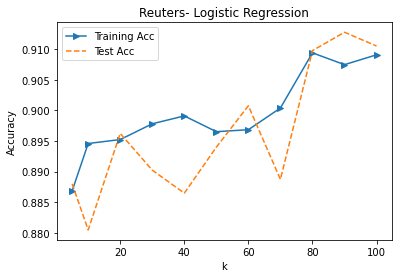

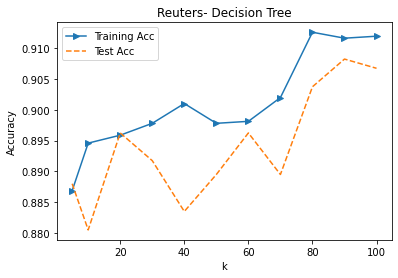

In [111]:
## Plotting
plt.figure(1)
plt.plot(KS,lr_train_acc,'->',label='Training Acc')
plt.plot(KS,lr_test_acc,'--',label='Test Acc')
plt.title('Reuters- Logistic Regression')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('Reuters-wracc-Logi.png')

plt.figure(2)
plt.plot(KS,dt_train_acc,'->',label='Training Acc')
plt.plot(KS,dt_test_acc,'--',label='Test Acc')
plt.title('Reuters- Decision Tree')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('Reuters-wracc-DecTr.png')